In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table, join, Column

from astropy.io import ascii
import glob, re

% matplotlib inline

import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=18               #10 
mpl.rcParams['savefig.dpi']= 200             #72 
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12


## This notebook reads in Keith's abundances and Guy's asteroseismology to produce the tables for the paper.

In [2]:
fname_diff = "../data/abundances/Pope_abundances_diff_arcturus.fits"
fname_nodiff = "../data/abundances/Pope_abundances_nodiff.fits"

In [3]:
diff = Table.read(fname_diff)
nodiff = Table.read(fname_nodiff)

How do abundances compare between the differential and non-differential methods? Not too badly. Many more elements lack differential abundances than absolute abundances so it looks like in the paper we shouldn't use the differential. Good to include in online data though.

/Users/benjaminpope/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


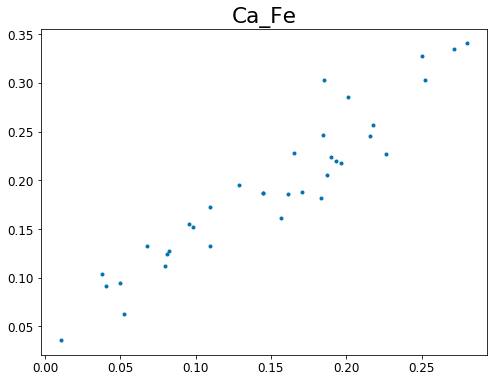

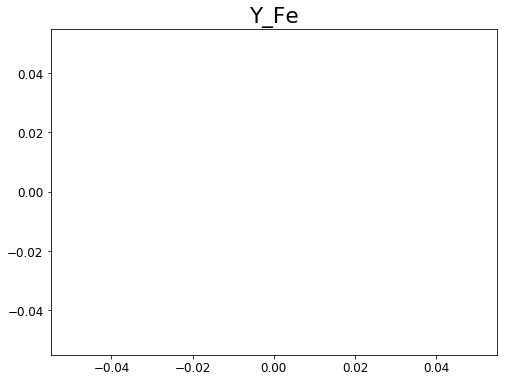

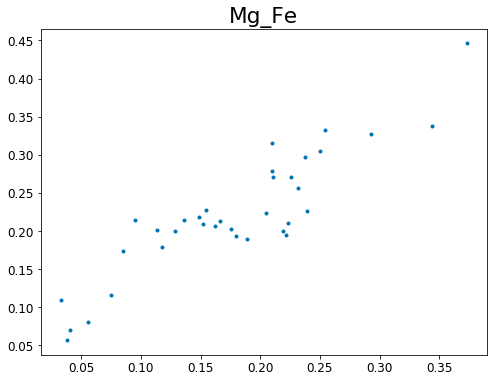

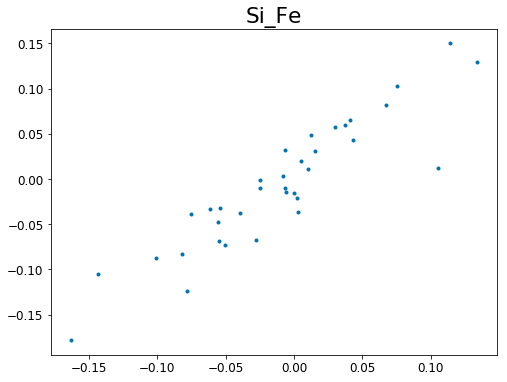

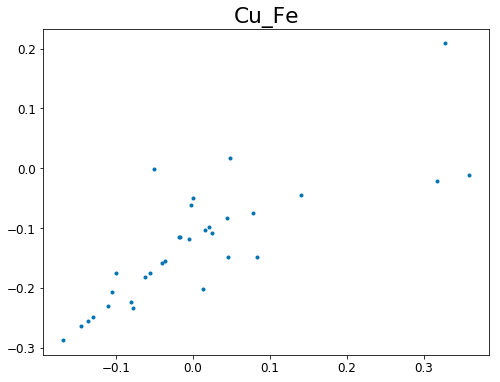

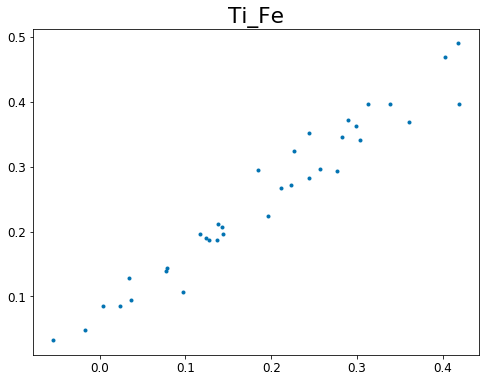

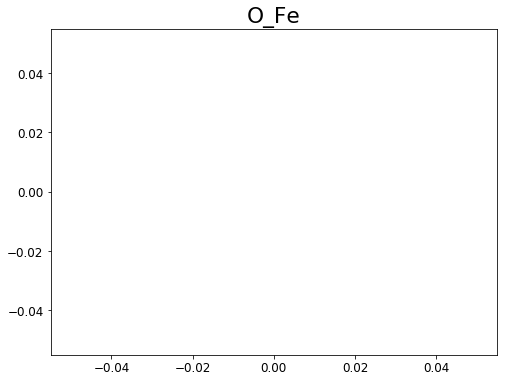

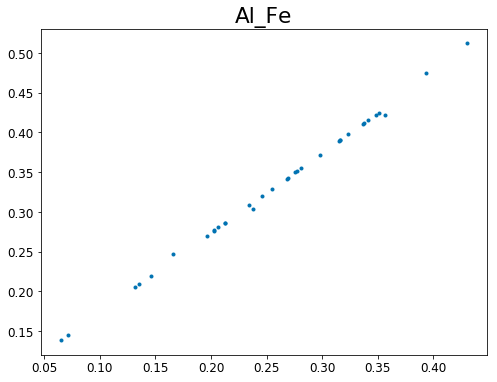

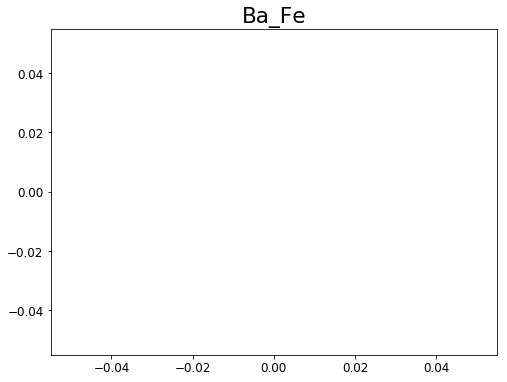

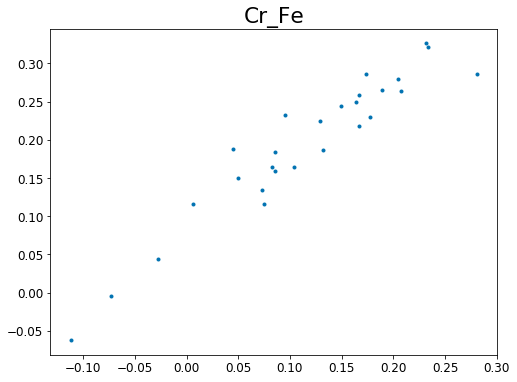

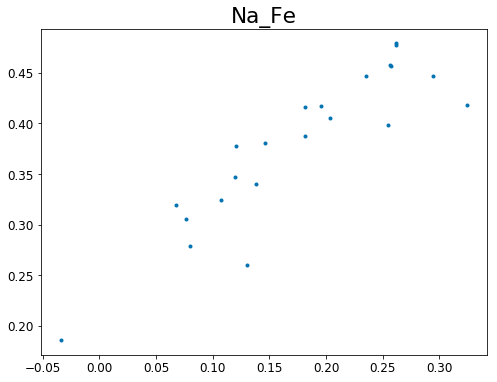

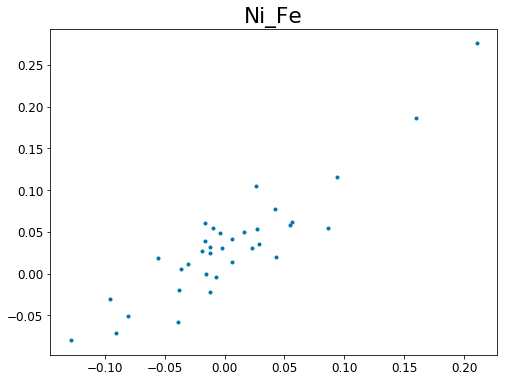

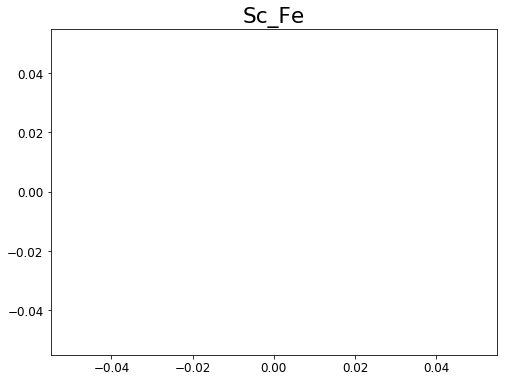

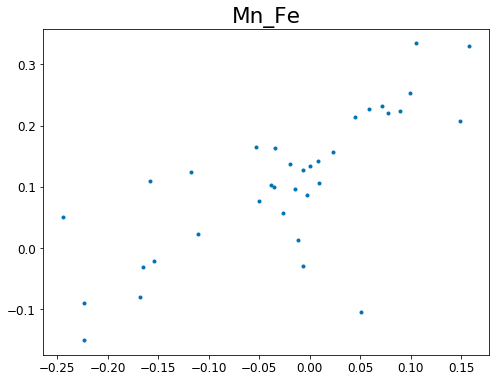

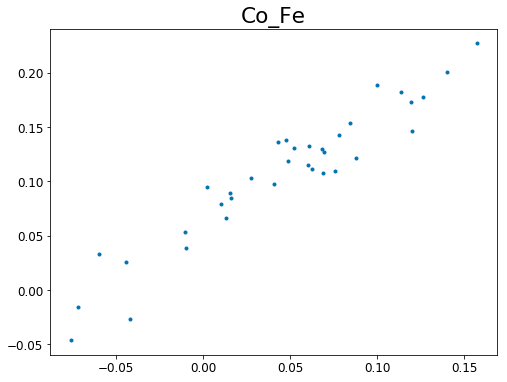

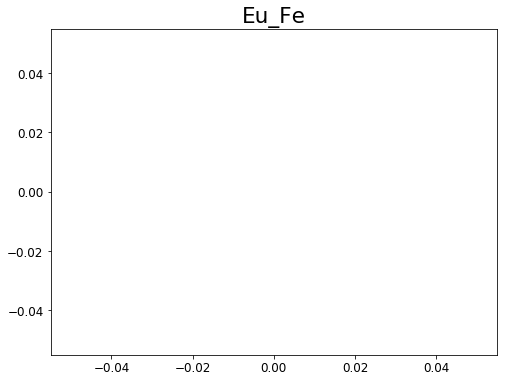

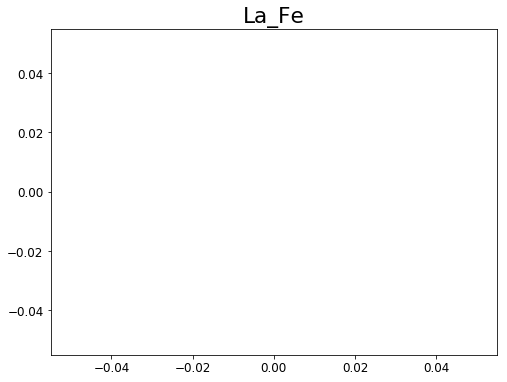

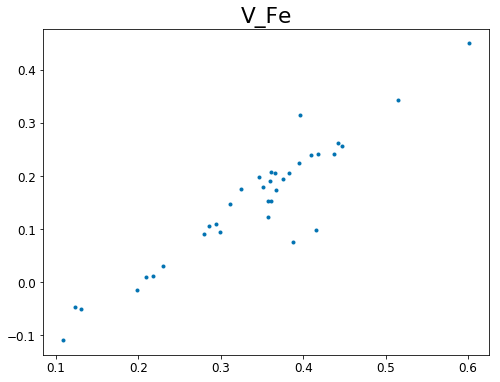

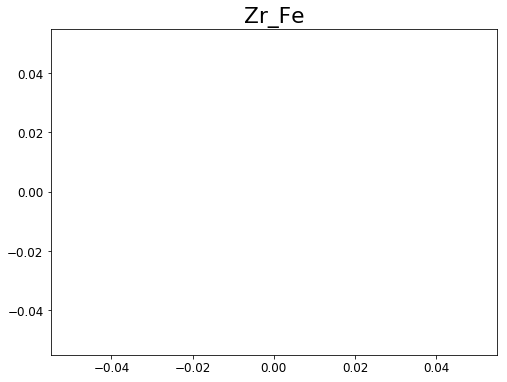

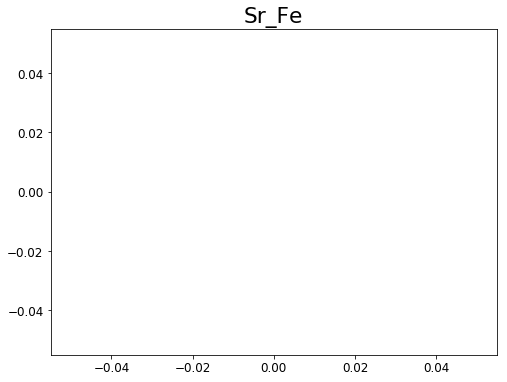

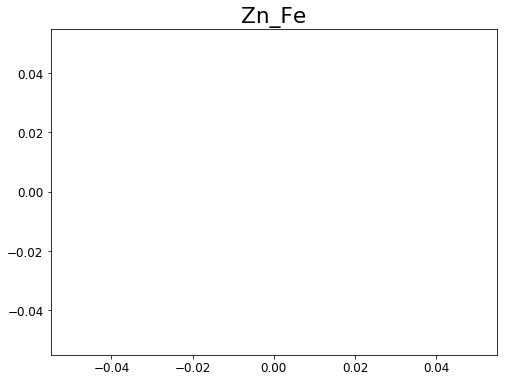

In [4]:
for j, key in enumerate(diff.keys()[1:]):
    if key[0]=='e':
        continue
    plt.figure(j)
    plt.plot(diff[key],nodiff[key],'.')
    plt.title(key)

In [5]:
nodiff

Object,Ca_Fe,eCa_Fe,Mg_Fe,eMg_Fe,Si_Fe,eSi_Fe,Ti_Fe,eTi_Fe,O_Fe,eO_Fe,Al_Fe,eAl_Fe,Ba_Fe,eBa_Fe,Na_Fe,eNa_Fe,Ni_Fe,eNi_Fe,Mn_Fe,eMn_Fe,Co_Fe,eCo_Fe,Eu_Fe,eEu_Fe,La_Fe,eLa_Fe,Zr_Fe,eZr_Fe,Sr_Fe,eSr_Fe,Zn_Fe,eZn_Fe,Y_Fe,eY_Fe,Cr_Fe,eCr_Fe,V_Fe,eV_Fe,Cu_Fe,eCu_Fe,Sc_Fe,eSc_Fe
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
BD+36_3564,0.20550000000000068,0.021811959427664313,0.32699999999999996,0.029981933288751386,0.1030000000000002,0.03033791174238739,0.3414999999999999,0.039563195412588896,nan,nan,0.39749999999999996,0.008838834764831969,nan,nan,0.2600000000000007,0.07726769244837267,0.006000000000000227,0.04284999081677555,0.07750000000000057,0.0045961940777125235,0.1299999999999999,0.023192941522005114,0.24799999999999933,0.02768573639981425,-0.016499999999999737,0.0659359300760974,0.10200000000000031,0.021922773547158676,0.3440000000000003,0.11825713509129157,-0.28699999999999903,0.19772933239377738,-0.2739999999999996,0.015773296262988193,0.23000000000000043,0.003797614382740828,0.1535000000000002,0.03049898435435564,-0.04499999999999971,0.06190150947270998,0.17300000000000093,0.017790381816734174
BD+39_3577,0.1330000000000009,0.024249415323230328,0.2150000000000003,0.03658925303282372,-0.10549999999999926,0.02174089847882709,0.08499999999999996,0.03879026485998592,nan,nan,0.20550000000000024,0.00954594154601844,0.3520000000000003,0.1010273157048059,0.41600000000000037,0.0,-0.051000000000000156,0.03328029088036782,-0.028999999999999027,0.05782989102787844,-0.015999999999999126,0.02072659732649556,-0.22100000000000009,0.04160228359116841,-0.254999999999999,0.015035759843588615,0.128000000000001,0.08221016968721083,nan,nan,-0.24099999999999877,0.7076482176901175,-0.4039999999999999,0.037289656991162025,0.1640000000000006,0.0952853444922145,0.010500000000000398,0.020276010901452025,-0.20599999999999952,0.012727922061357708,-0.12499999999999956,0.053405093390050375
BD+43_3064,0.18600000000000083,0.042992624259758146,0.2110000000000003,0.03401960219246152,-0.013999999999999346,0.030231207814540438,0.28249999999999975,0.044954827587674044,nan,nan,0.3550000000000004,0.010606601717797986,nan,nan,0.4790000000000001,0.06424951361683594,0.052999999999999936,0.044591812612475384,0.21400000000000086,0.024748737341528947,0.1330000000000009,0.02184520148655853,0.28000000000000025,0.05847007781763251,0.14950000000000063,0.017140503930748237,0.3230000000000004,0.03883977342879325,0.24800000000000022,0.12460813576970005,nan,nan,-0.13999999999999968,0.051714601419715026,0.32200000000000095,0.013075280607427315,0.24100000000000055,0.034289644203321076,-0.15899999999999936,0.09666551723454563,0.13700000000000045,0.024837935349126893
BD+43_3171,0.28550000000000075,0.027774123216385355,0.2570000000000001,0.06383866383313486,-0.0004999999999997229,0.06954906181969671,0.20650000000000013,0.05828622108614094,nan,nan,0.4225000000000003,0.012968712349342808,0.32650000000000023,0.17867480936046912,0.18350000000000044,0.24711535767734086,0.04100000000000037,0.05452977168483287,0.1095000000000006,0.0947523086789976,0.1385000000000005,0.05128187695268264,0.2134999999999998,0.04800520805079382,-0.057999999999999385,0.11110636795431662,0.3585000000000007,0.06505382386916242,nan,nan,-0.40499999999999936,0.05055813485483807,-0.3059999999999996,0.030052038200428254,0.2940000000000005,0.03995153313703977,0.12350000000000039,0.056319659089877294,0.017000000000000348,0.10812319362652953,0.1435000000000004,0.032129667788764645
BD+43_3213,0.1880000000000006,0.02661522816679147,0.22599999999999998,0.07206097859790929,-0.1779999999999995,0.11026558846711877,0.2709999999999999,0.06893329102190833,nan,nan,0.37200000000000033,0.038890872965260226,nan,nan,0.6230000000000002,0.367428

In [7]:
elements = filter(lambda x: x[0]!='e', nodiff.keys()[1:])
print elements

['Ca_Fe', 'Mg_Fe', 'Si_Fe', 'Ti_Fe', 'O_Fe', 'Al_Fe', 'Ba_Fe', 'Na_Fe', 'Ni_Fe', 'Mn_Fe', 'Co_Fe', 'Eu_Fe', 'La_Fe', 'Zr_Fe', 'Sr_Fe', 'Zn_Fe', 'Y_Fe', 'Cr_Fe', 'V_Fe', 'Cu_Fe', 'Sc_Fe']


### Create a string-formatted table merging abundances with their uncertainties appropriately.

In [9]:
newtab = Table([Column([str(obj).replace('_',' ') for obj in nodiff['Object']],name='Object')])

for el in elements[:8]:
    if el == 'O_Fe':
        continue
    col = nodiff[el]
    ecol = nodiff['e%s' % el]
    test = Column(['--' if 'nan' in str(col[j]) else '$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name=el.replace('_Fe',''))
#     test = Column(['$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name=el.replace('_Fe',''))

    newtab.add_column(test)
    
#     print el


newtab2 = Table([Column([str(obj).replace('_',' ') for obj in nodiff['Object']],name='Object')])

for el in elements[8:15]:
    col = nodiff[el]
    ecol = nodiff['e%s' % el]
    test = Column(['--' if 'nan' in str(col[j]) else '$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name=el.replace('_Fe',''))
#     test = Column(['$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name=el.replace('_Fe',''))

    newtab2.add_column(test)
    
newtab3 = Table([Column([str(obj).replace('_',' ') for obj in nodiff['Object']],name='Object')])

for el in elements[15:]:
    col = nodiff[el]
    ecol = nodiff['e%s' % el]
    test = Column(['--' if 'nan' in str(col[j]) else '$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name=el.replace('_Fe',''))
#     test = Column(['$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name=el.replace('_Fe',''))

    newtab3.add_column(test)

    
# newtab_diff = Table([diff['Object']])

# for el in elements:
#     col = diff[el]
#     ecol = diff['e%s' % el]
#     test = Column(['--' if 'nan' in str(col[j]) else '%.2f $\pm$ %.2f' % (col[j],ecol[j]) for j, x in enumerate(col)],name=el.replace('_Fe',''))
# #     test = Column(['$%.2f \pm %.2f$' % (col[j],ecol[j]) for j, x in enumerate(col)],name=el.replace('_Fe',''))

#     newtab_diff.add_column(test)


## Now produce three LaTeX tables to go into the paper directory.

In [12]:
latexdict = ascii.latex.latexdicts['AA']
latexdict['tabletype']= 'table*'

caption1 = r'Abundances determined by BACCHUS, without differential line-by-line comparison to Arcturus, as described in Section~\ref{spectroscopy}, for the elements %s. Dashes indicate elements for which abundances could not be reliably computed.' % ", ".join([el.replace('_Fe','') for el in filter(lambda x: x !='O_Fe',elements[0:8])])
caption2 = r'Abundances determined by BACCHUS, without differential line-by-line comparison to Arcturus, as described in Section~\ref{spectroscopy}, for the elements %s. Dashes indicate elements for which abundances could not be reliably computed.' % ", ".join([el.replace('_Fe','') for el in elements[8:15]])
caption3 = r'Abundances determined by BACCHUS, without differential line-by-line comparison to Arcturus, as described in Section~\ref{spectroscopy}, for the elements %s. Dashes indicate elements for which abundances could not be reliably computed.' % ", ".join([el.replace('_Fe','') for el in elements[15:]])

caption1 = caption1+r'The catalogue of abundances for more elements continues in Tables~\ref{table2} and~\ref{table3}.'
caption2 = caption2+r'The catalogue of abundances for more elements continues in Table~\ref{table3}.'


newtab.write('../paper/abundances_1.tex',format='latex',latexdict=latexdict,caption=caption1+'\label{table1}')
newtab2.write('../paper/abundances_2.tex',format='latex',latexdict=latexdict,caption=caption2+'\label{table2}')
newtab3.write('../paper/abundances_3.tex',format='latex',latexdict=latexdict,caption=caption3+'\label{table3}')